In [3]:
import sys
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [4]:
X, y = make_blobs()

len(X) == len(y)

True

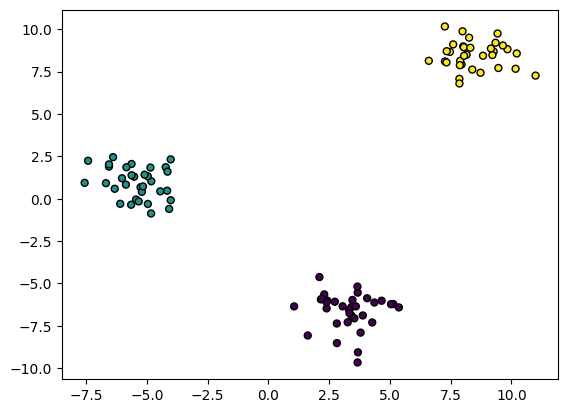

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [29]:
import random
import numpy as np
import math

from collections import defaultdict

class KMeans:
    def __init__(self, X, k: int = 3) -> None:
        self.k = k
        self.centroids = None
        self.X = X
        self.length = X.shape[0]
        self._centroids = None


    def get_centroids(self, k: int = 3):
        idxes = np.random.choice(
            self.length, 
            size=k, 
            replace=False
        )
        return self.X[idxes]


    def fit_once(self, centroids):
        closest_centroids = [None] * self.length
        distances = [None] * self.length
        labels = [None] * self.length
        

        def _compute_distance(a, b):
            return math.sqrt(
                (a[0] - b[0]) ** 2 +
                (a[1] - b[1]) ** 2
            )


        for idx, x in enumerate(self.X):
            chosen_centroid = None
            min_distance = float("inf")

            for candidate_idx, candidate_centroid in enumerate(centroids):
                candidate_distance = _compute_distance(x, candidate_centroid)

                if candidate_distance < min_distance:
                    chosen_centroid = candidate_centroid
                    min_distance = candidate_distance
                    closest_centroids[idx] = chosen_centroid
                    labels[idx] = candidate_idx
            
            distances[idx] = min_distance
        
        mean_distance = sum(distances) / self.length
        return closest_centroids, labels, mean_distance

    def find_centroids(self, labels, k: int = 3):
        points = defaultdict(list)
        for idx, label in enumerate(labels):
            points[label].append(self.X[idx])
        
        centroids = []
        for idx, group in points.items():
            # print(group)
            np_group = np.array(group)
            # print(np_group)
            centroids.append(np_group.mean(axis=1))
        
        return centroids


    def fit(self, tol=0.0001, max_iter=100):
        best_distance = float("inf")
        labels = None

        for iter_num in range(max_iter):
            if iter_num == 0:
                init_centroids = self.get_centroids(k=self.k)
                self._centroids = init_centroids
                _, labels, best_distance = self.fit_once(init_centroids)
                
            else:
                centroids = self.find_centroids(labels, k=self.k)
                _, new_labels, new_mean_distance = self.fit_once(centroids)
                if new_mean_distance < best_distance:
                    if new_mean_distance - best_distance <= tol:
                        print("can't find better distance, stopping")
                        return labels

                    labels = new_labels
                    best_distance = new_mean_distance
                    self._centroids = centroids
        
            # print(best_distance)
        return labels

In [36]:
# for _ in range(10):
k_means = KMeans(X=X, k=3)
labels = k_means.fit(max_iter=10)
# print("===")
# len(set(labels))

In [37]:
centroids = np.array(k_means._centroids)
centroids

array([[ 3.68382795, -9.06765507],
       [ 7.94786692,  7.92432433],
       [-6.02731399,  1.20353641]])

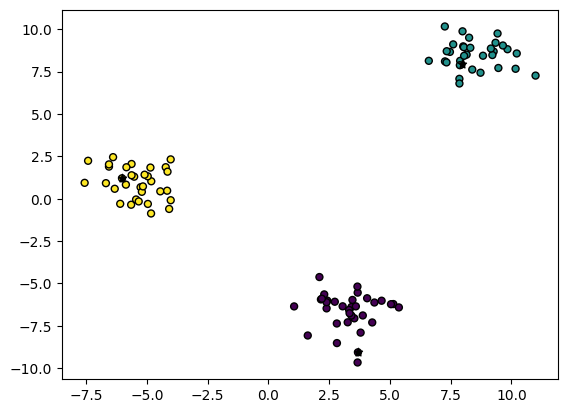

In [38]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", c="black")
plt.show()


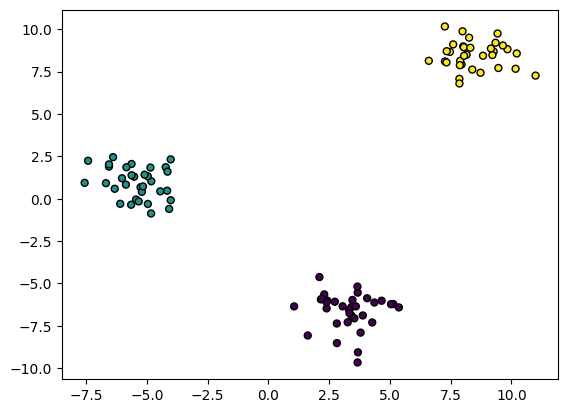

In [16]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()
